In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('dataset/historico.csv', encoding='latin-1')
df.head()

,Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total,Bioma
0,1998,-,-,-,-,-,1549,3192,20075,19214,8777,3833,2547,59187,Amazônia
1,1999,160,358,130,70,449,1439,3675,21525,16106,12794,4449,1703,62858,Amazônia
2,2000,87,182,405,92,930,3211,1510,12791,10062,10226,5497,3175,48168,Amazônia
3,2001,165,699,1134,617,916,4227,1816,17679,15528,14292,8346,4256,69675,Amazônia
4,2002,590,667,901,405,1490,5702,7529,43484,48549,27110,23660,9174,169261,Amazônia


In [6]:
df.replace('-', 0, inplace=True)
df.head()

,Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total,Bioma
0,1998,0,0,0,0,0,1549,3192,20075,19214,8777,3833,2547,59187,Amazônia
1,1999,160,358,130,70,449,1439,3675,21525,16106,12794,4449,1703,62858,Amazônia
2,2000,87,182,405,92,930,3211,1510,12791,10062,10226,5497,3175,48168,Amazônia
3,2001,165,699,1134,617,916,4227,1816,17679,15528,14292,8346,4256,69675,Amazônia
4,2002,590,667,901,405,1490,5702,7529,43484,48549,27110,23660,9174,169261,Amazônia


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Ano        138 non-null    int64 
 1   Janeiro    138 non-null    object
 2   Fevereiro  138 non-null    object
 3   Março      138 non-null    object
 4   Abril      138 non-null    object
 5   Maio       138 non-null    object
 6   Junho      138 non-null    object
 7   Julho      138 non-null    object
 8   Agosto     138 non-null    int64 
 9   Setembro   138 non-null    object
 10  Outubro    138 non-null    int64 
 11  Novembro   138 non-null    int64 
 12  Dezembro   138 non-null    int64 
 13  Total      138 non-null    int64 
 14  Bioma      138 non-null    object
dtypes: int64(6), object(9)
memory usage: 16.3+ KB


In [8]:
df.describe()

,Ano,Agosto,Outubro,Novembro,Dezembro,Total
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,2009.000000,7844.094203,6418.630435,3733.144928,1952.847826,36821.086957
std,6.657415,11567.152323,7099.435777,5205.023111,2837.979231,45979.083255
min,1998.000000,7.000000,5.000000,2.000000,6.000000,154.000000
25%,2003.000000,567.750000,922.500000,276.000000,132.500000,5371.750000
50%,2009.000000,2477.000000,3946.000000,1777.500000,862.500000,16705.000000
75%,2015.000000,10354.500000,8972.750000,4920.750000,1925.500000,58796.750000
max,2020.000000,63764.000000,28731.000000,26424.000000,16924.000000,218637.000000


In [16]:
col = list(df.columns)
for j in range(df.shape[1]):
    print(col[j])
    for i in range(10):
        print(type(df[col[j]][i]))

Ano
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
Janeiro
<class 'int'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
Fevereiro
<class 'int'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
Março
<class 'int'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
Abril
<class 'int'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
Maio
<class 'int'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
Junho
<class 'str'>
<class 'str'>
<class 

In [18]:
for i in range(df.shape[1]-1):
    df[col[i]] = df[col[i]].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Ano        138 non-null    int32 
 1   Janeiro    138 non-null    int32 
 2   Fevereiro  138 non-null    int32 
 3   Março      138 non-null    int32 
 4   Abril      138 non-null    int32 
 5   Maio       138 non-null    int32 
 6   Junho      138 non-null    int32 
 7   Julho      138 non-null    int32 
 8   Agosto     138 non-null    int32 
 9   Setembro   138 non-null    int32 
 10  Outubro    138 non-null    int32 
 11  Novembro   138 non-null    int32 
 12  Dezembro   138 non-null    int32 
 13  Total      138 non-null    int32 
 14  Bioma      138 non-null    object
dtypes: int32(14), object(1)
memory usage: 8.8+ KB


In [21]:
df.to_csv('dataset/historico_bioma.csv', encoding='latin-1', index=False)

In [23]:
df = pd.read_csv('dataset/historico_bioma.csv', encoding='latin-1')

In [25]:
x = df.columns.values[1:13]


In [27]:
df_aux = df[df['Bioma'] == 'Amazônia']


In [30]:
y = df_aux.loc[0][1:13]

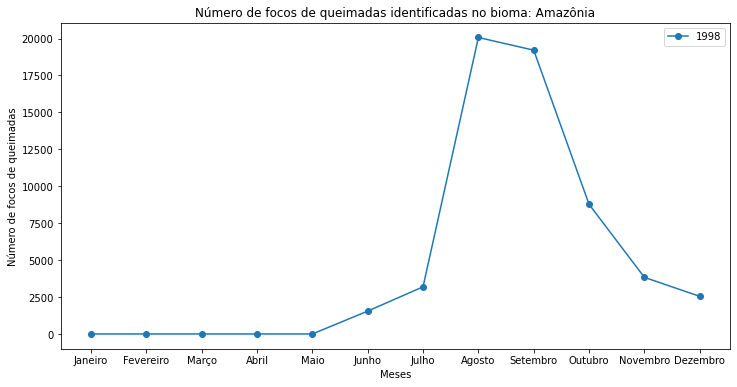

In [36]:
plt.figure(figsize=(12,6))
plt.plot(x, y, label=str(df.loc[0][0]), marker='o')
plt.xlabel('Meses')
plt.ylabel('Número de focos de queimadas')
plt.title('Número de focos de queimadas identificadas no bioma: '+str(df.loc[0][14]))
plt.legend()
plt.show();

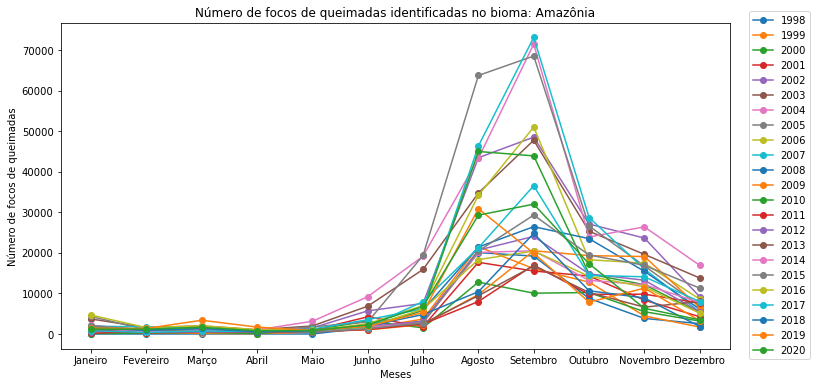

In [43]:
plt.figure(figsize=(12,6))
for i in range(df_aux.shape[0]):
    plt.plot(x,df_aux.loc[i][1:13], label=str(df.loc[i][0]), marker='o')
plt.xlabel('Meses')
plt.ylabel('Número de focos de queimadas')
plt.title('Número de focos de queimadas identificadas no bioma: '+str(df.loc[0][14]))
plt.legend(bbox_to_anchor = (1.02,1.05))
plt.show();

In [37]:
df_aux.shape[0]

23

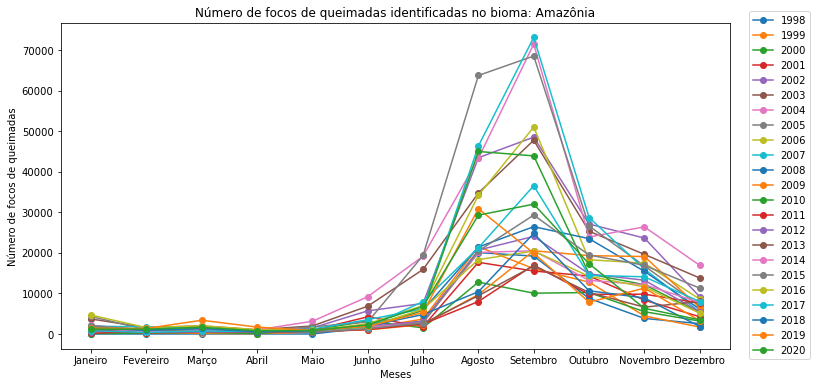

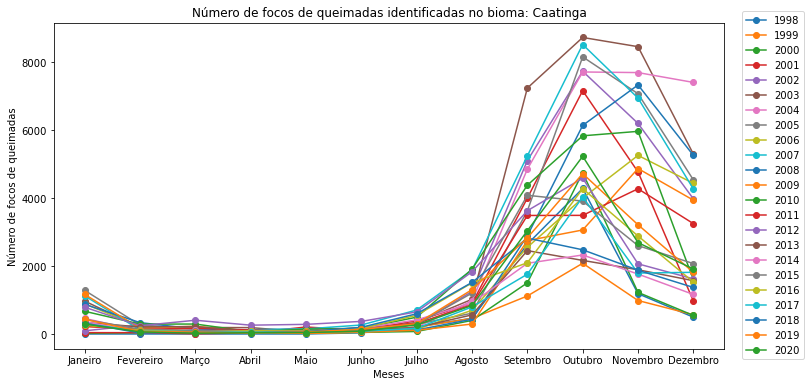

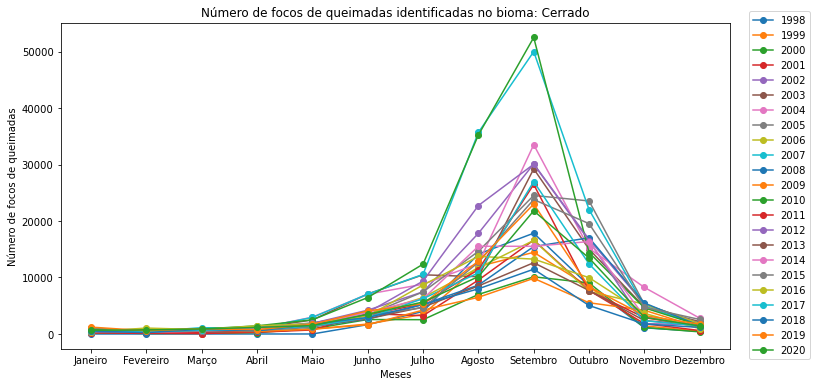

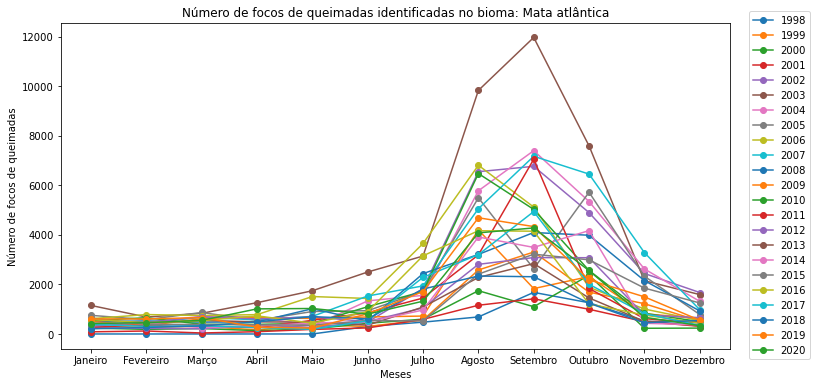

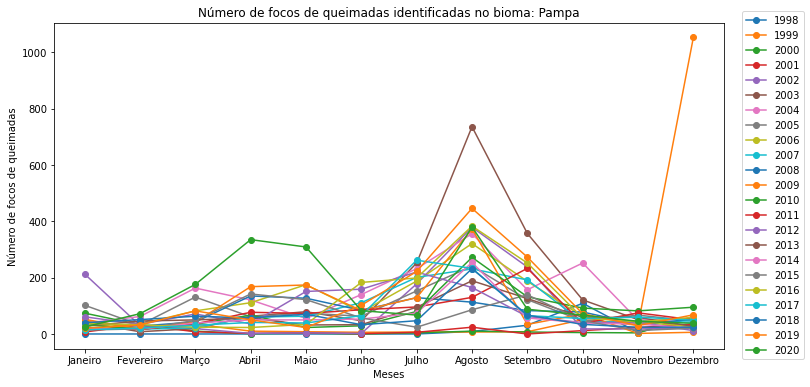

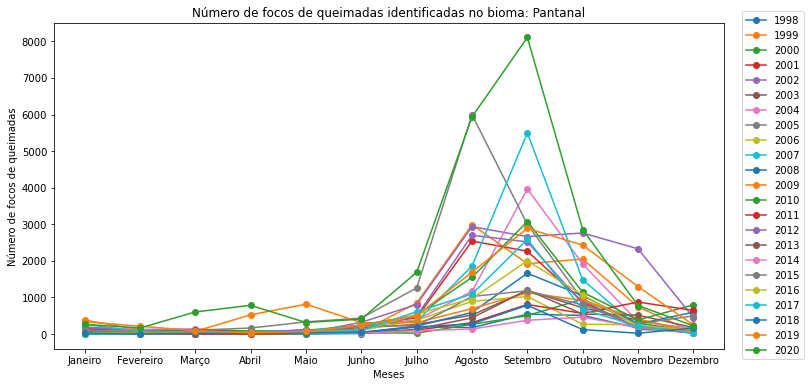

In [49]:
for j in range(len(df['Bioma'].unique())):
    df_aux = df[df['Bioma'] == df['Bioma'].unique()[j]]
    df_aux.reset_index(drop=True, inplace=True)
 
    plt.figure(figsize=(12,6))
    for i in range(df_aux.shape[0]):
         plt.plot(df_aux.columns.values[1:13],
                  df_aux.loc[i][1:13], 
                  label=str(df.loc[i][0]), 
                  marker='o')
    plt.xlabel('Meses')
    plt.ylabel('Número de focos de queimadas')
    plt.title('Número de focos de queimadas identificadas no bioma: '+str(df_aux.loc[0][14]))
    plt.legend(bbox_to_anchor = (1.02,1.05))
    plt.show();

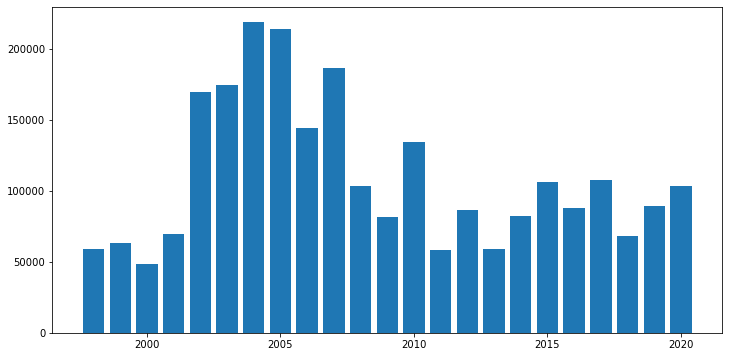

In [51]:
df_aux = df[df['Bioma'] == 'Amazônia']
plt.figure(figsize=(12,6))
plt.bar(df_aux['Ano'],
       df_aux['Total'])
plt.show();

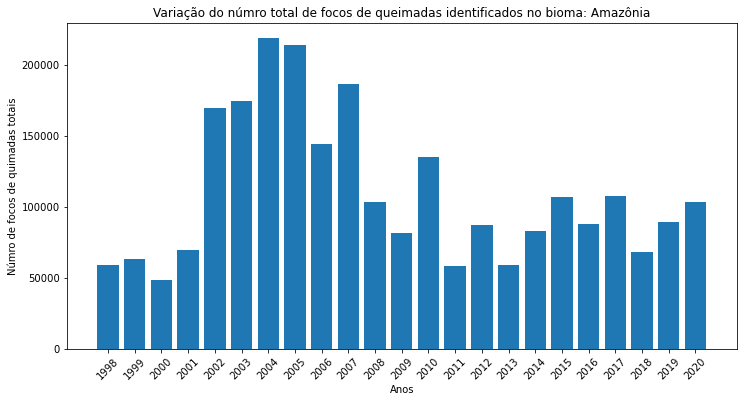

In [53]:
df_aux = df[df['Bioma'] == 'Amazônia']
plt.figure(figsize=(12,6))
plt.bar(df_aux['Ano'],
       df_aux['Total'])
plt.xlabel('Anos')
plt.ylabel('Númro de focos de quimadas totais')
plt.title('Variação do númro total de focos de queimadas identificados no bioma: '+ df_aux['Bioma'][0])
plt.xticks(df_aux['Ano'], rotation=45)
plt.show();

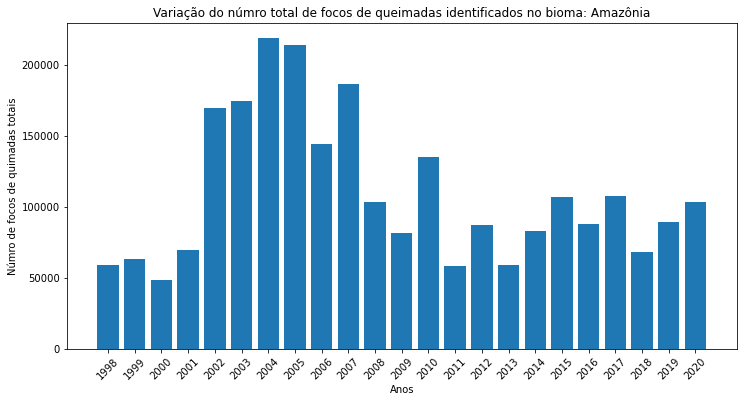

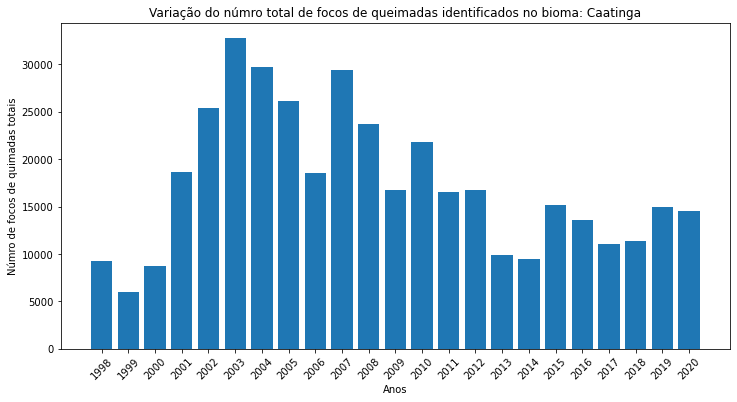

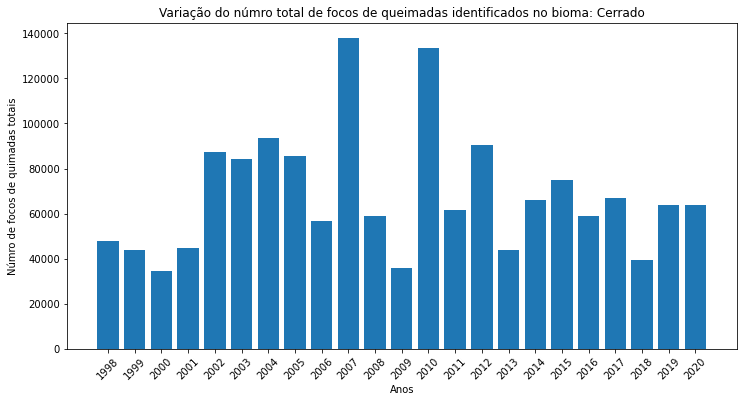

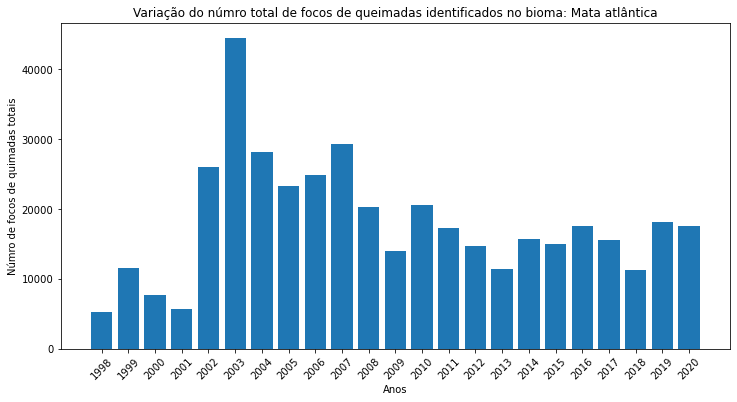

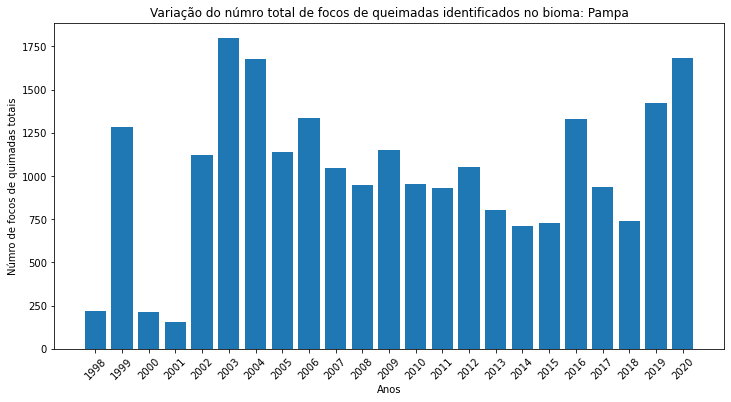

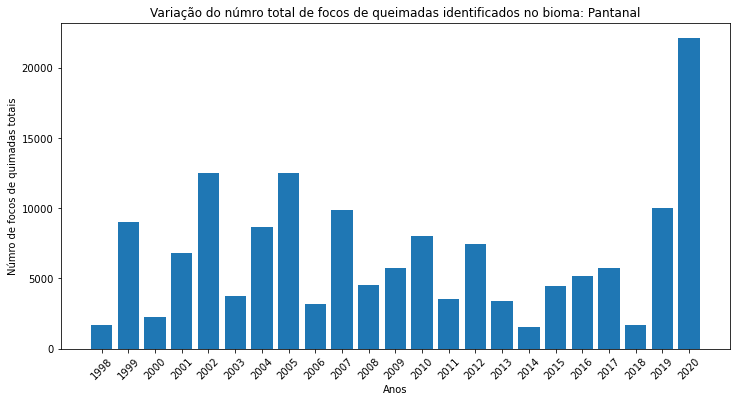

In [54]:
for j in range(len(df['Bioma'].unique())):
    df_aux = df[df['Bioma'] == df['Bioma'].unique()[j]]
    df_aux.reset_index(drop=True, inplace=True)
    plt.figure(figsize=(12,6))
    plt.bar(df_aux['Ano'],
            df_aux['Total'])
    plt.xlabel('Anos')
    plt.ylabel('Númro de focos de quimadas totais')
    plt.title('Variação do númro total de focos de queimadas identificados no bioma: '+ df_aux['Bioma'][j] )
    plt.xticks(df_aux['Ano'], rotation=45)
    plt.show();

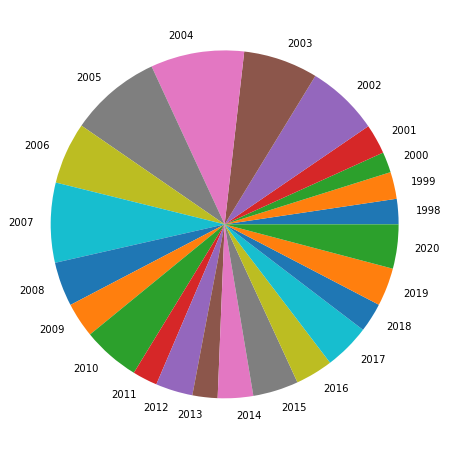

In [55]:
df_aux = df[df['Bioma']=='Amazônia']
plt.figure(figsize=(8,8))
plt.pie(x=df_aux['Total'],
       labels = df_aux['Ano'])
plt.show();

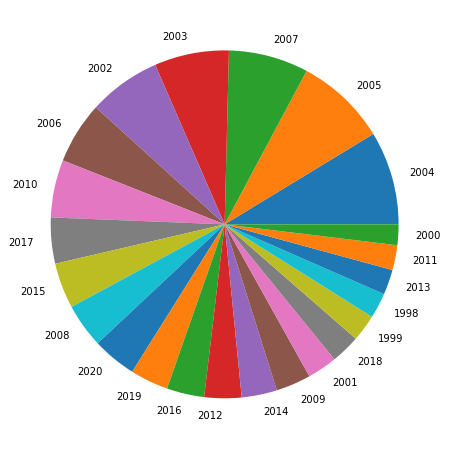

In [56]:
df_aux = df[df['Bioma']=='Amazônia']
x,y = zip(*sorted(zip(df_aux['Total'], 
                      df_aux['Ano']), reverse=True))
plt.figure(figsize=(8,8))
plt.pie(x=x,
       labels = y)
plt.show();

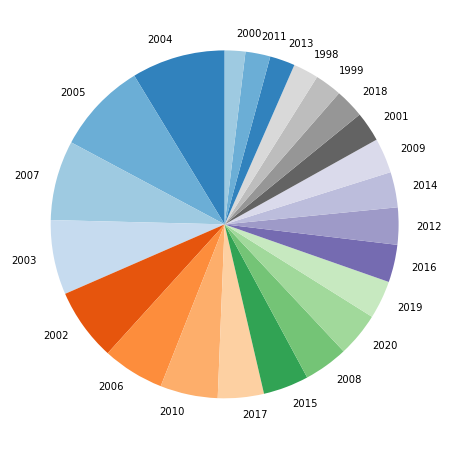

In [57]:
from matplotlib import cm
df_aux = df[df['Bioma']=='Amazônia']
x,y = zip(*sorted(zip(df_aux['Total'], 
                      df_aux['Ano']), reverse=True))
plt.figure(figsize=(8,8))
plt.pie(x=x,
       labels = y,
       colors=cm.tab20c.colors,
       startangle=90)
plt.show();

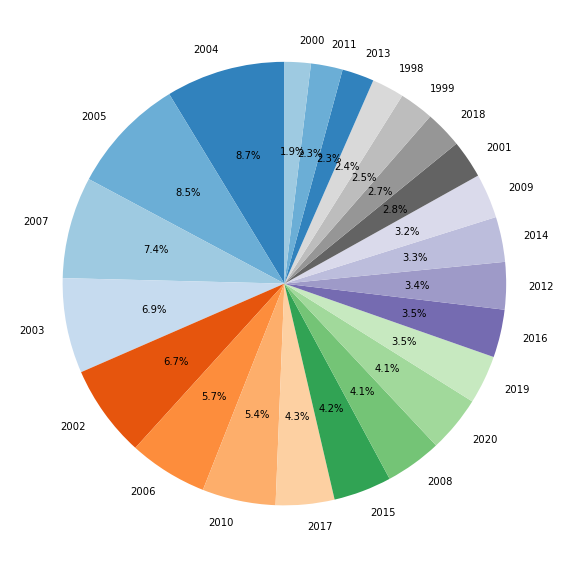

In [58]:
df_aux = df[df['Bioma']=='Amazônia']
x,y = zip(*sorted(zip(df_aux['Total'], 
                      df_aux['Ano']), reverse=True))
plt.figure(figsize=(8,8))
plt.pie(x=x,
       labels = y,
       colors=cm.tab20c.colors,
       startangle=90,
       autopct='%1.1f%%')
plt.tight_layout()
plt.show();

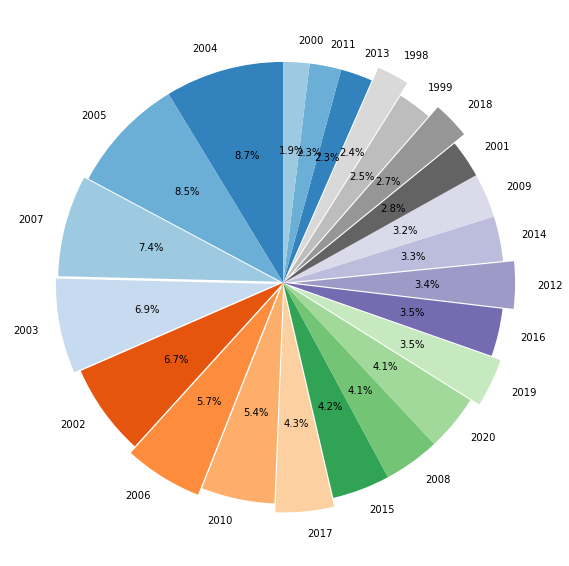

In [61]:
df_aux = df[df['Bioma']=='Amazônia']
x,y = zip(*sorted(zip(df_aux['Total'], 
                      df_aux['Ano']), reverse=True))
plt.figure(figsize=(8,8))
plt.pie(x=x,
       labels = y,
       colors=cm.tab20c.colors,
       startangle=90,
       autopct='%1.1f%%',
       explode = [0, 0, 0.02, 0.03, 0, 0.035, 0, 0.040, 0, 0, 0, 0.045, 0, 0.05, 0, 0, 0, 0.060, 0, 0.065, 0, 0, 0]
       )
plt.tight_layout()
plt.show();

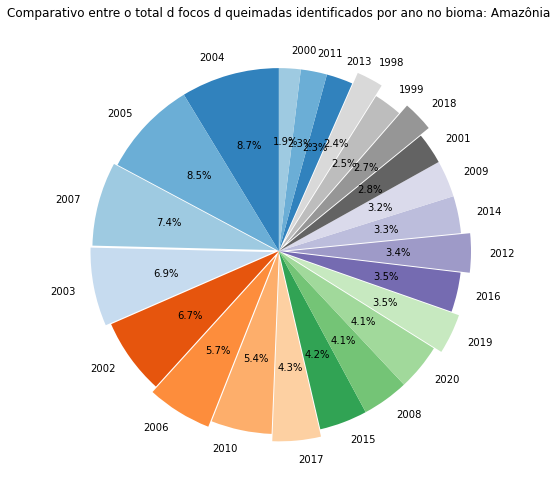

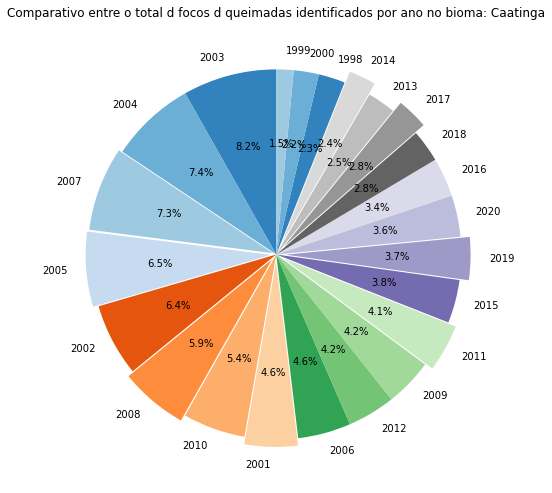

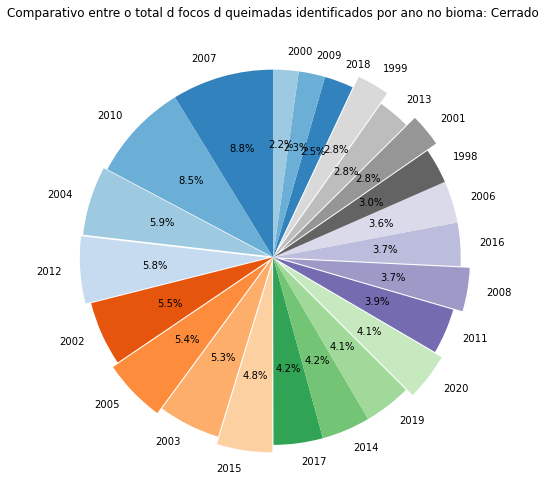

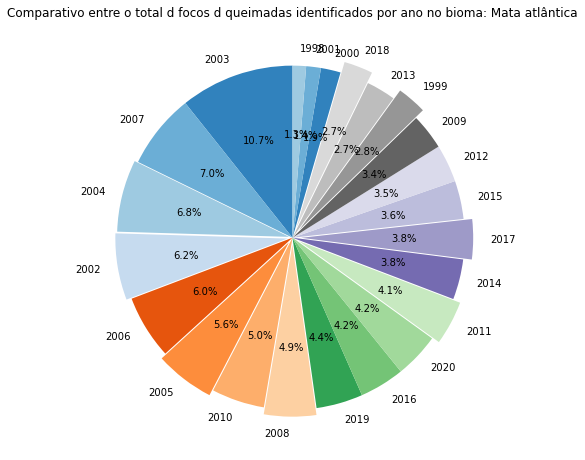

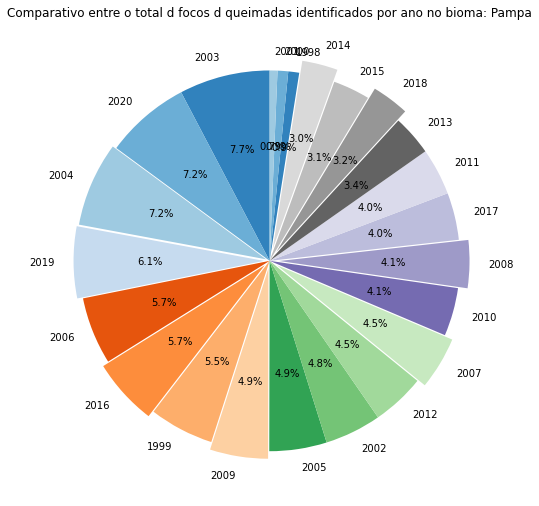

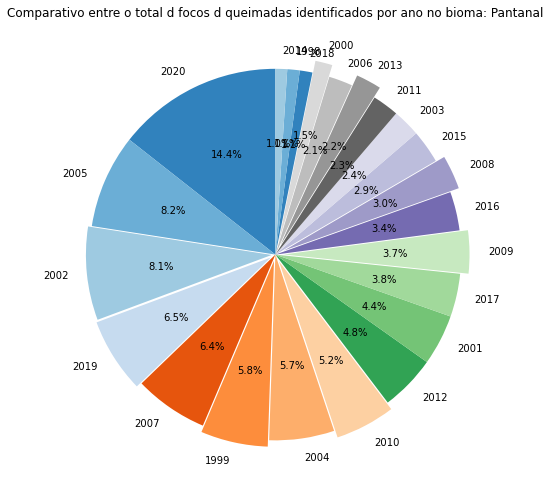

In [63]:
for j in range(len(df['Bioma'].unique())):
    df_aux = df[df['Bioma'] == df['Bioma'].unique()[j]]
    x,y = zip(*sorted(zip(df_aux['Total'], 
                      df_aux['Ano']), reverse=True))
    plt.figure(figsize=(8,8))
    plt.pie(x=x,
           labels = y,
           colors=cm.tab20c.colors,
           startangle=90,
           autopct='%1.1f%%',
           explode = [0, 0, 0.02, 0.03, 0, 0.035, 0, 0.040, 0, 0, 0, 0.045, 0, 0.05, 0, 0, 0, 0.060, 0, 0.065, 0, 0, 0]
           )
    plt.title('Comparativo entre o total d focos d queimadas identificados por ano no bioma: ' + df['Bioma'].unique()[j])
    plt.tight_layout()
    plt.show();